In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
#yarıyıl boyunca beş test üzerinden performansları..
tests = pd.read_csv("testperform_long.csv")
tests.head()

,id,name,value,test
0,1,zero,64.270000,0
1,1,one,65.950884,1
2,1,two,69.865513,2
3,1,three,70.071844,3
4,1,four,71.557456,4


In [3]:
tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      150 non-null    int64  
 1   name    150 non-null    object 
 2   value   150 non-null    float64
 3   test    150 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.8+ KB


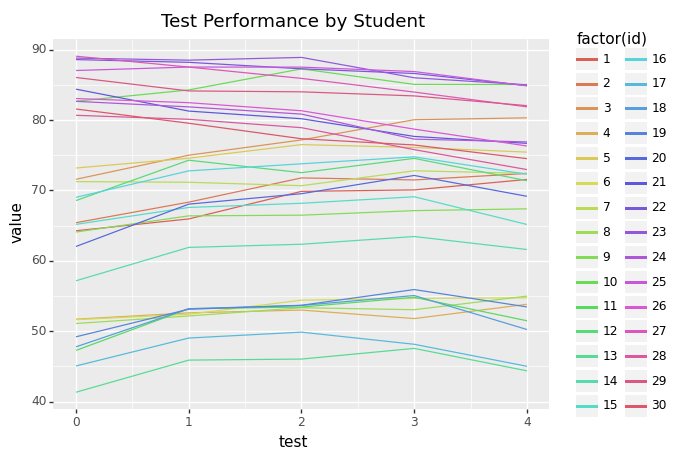

<ggplot: (101389433058)>

In [5]:
# öğrencileri bu beş testteki performanslarına göre gruplayacağız.
(ggplot(tests, aes("test", "value", color = "factor(id)")) + geom_line() +
  ggtitle("Test Performance by Student"))

In [6]:
# wide data

tests_wide = pd.read_csv("testperform.csv")

tests_wide.head()

,zero,one,two,three,four,id
0,64.27,65.950884,69.865513,70.071844,71.557456,1
1,65.42,68.334638,71.774954,71.488519,72.414197,2
2,71.58,75.002741,77.169056,80.038548,80.307990,3
3,51.71,52.610899,53.005482,51.800135,53.829034,4
4,73.18,74.575287,76.507547,76.102415,75.441424,5


In [7]:
tests_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   zero    30 non-null     float64
 1   one     30 non-null     float64
 2   two     30 non-null     float64
 3   three   30 non-null     float64
 4   four    30 non-null     float64
 5   id      30 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.5 KB


In [ ]:
#scaling işlemine gerek yok.. zaten hepsinin aralıkları 0 ile 100 arasında..

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [17]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

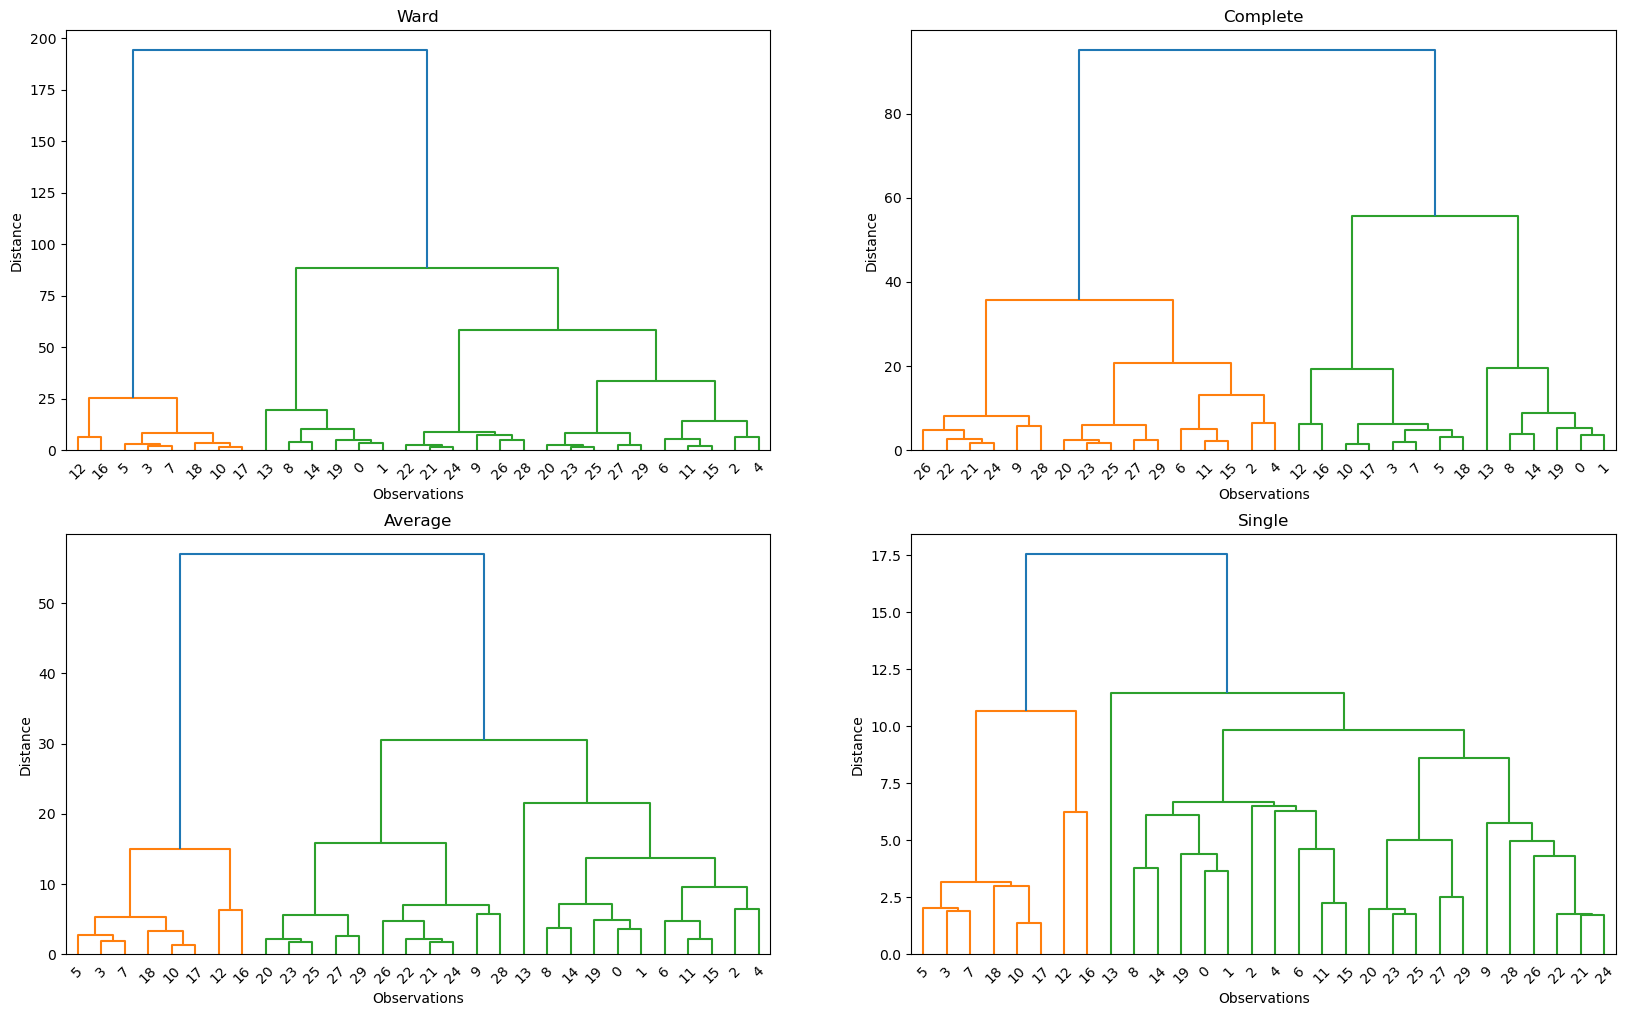

In [19]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);


In [ ]:
#buradan ward kullanmaya karar veriyoruz.

In [8]:
features = ["zero", "one", "two", "three", "four"]

X = tests_wide[features]

hac = AgglomerativeClustering(affinity = "euclidean",
                             linkage = "ward")

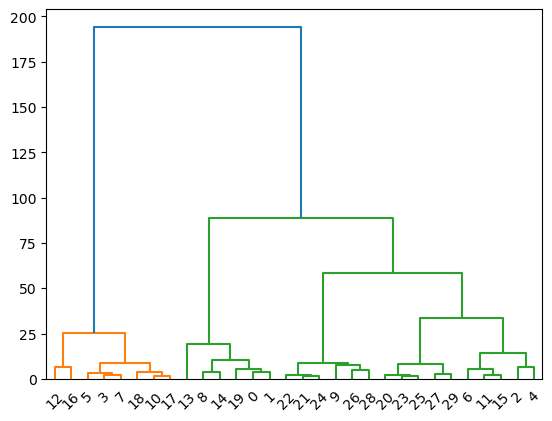

In [9]:
hac.fit(X)

dendro = sch.dendrogram(sch.linkage(X, method='ward'))

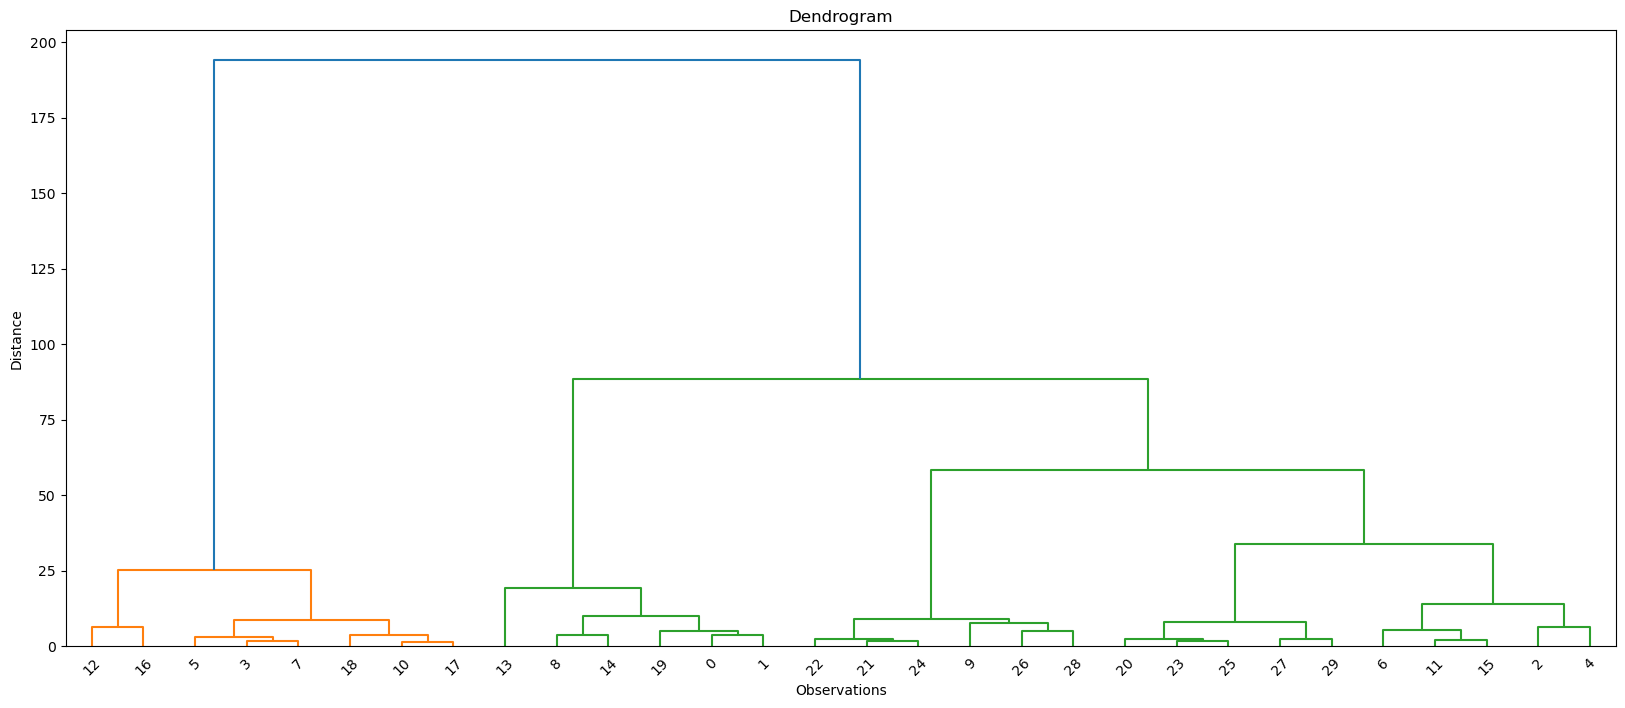

In [18]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

In [10]:
hac = AgglomerativeClustering(n_clusters = 3,
                              affinity = "euclidean",
                             linkage = "ward")
hac.fit(X)



AgglomerativeClustering(n_clusters=3)

In [11]:
membership = hac.labels_
membership

array([2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
silhouette_score(X,membership)

0.5275892679012393

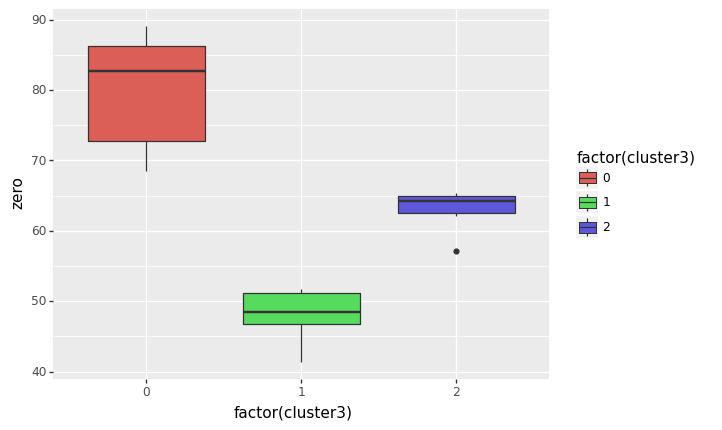

<ggplot: (101389380636)>

In [13]:
tests_wide["cluster3"] = membership
(ggplot(tests_wide, aes(x = "factor(cluster3)", y = "zero")) + geom_boxplot(aes(fill = "factor(cluster3)")))

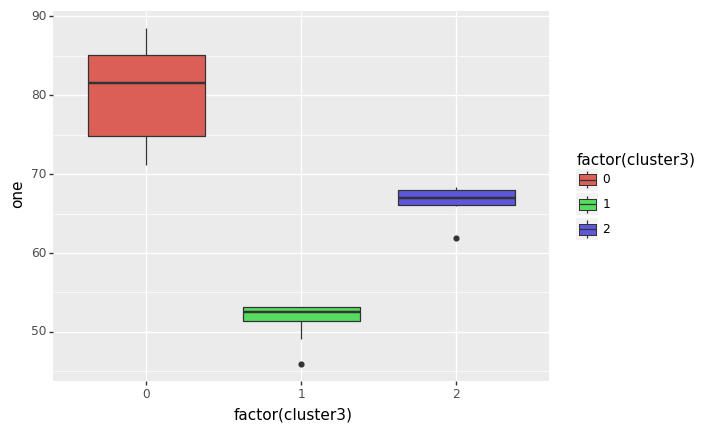

<ggplot: (101390156746)>

In [14]:
(ggplot(tests_wide, aes(x = "factor(cluster3)", y = "one")) + geom_boxplot(aes(fill = "factor(cluster3)")))

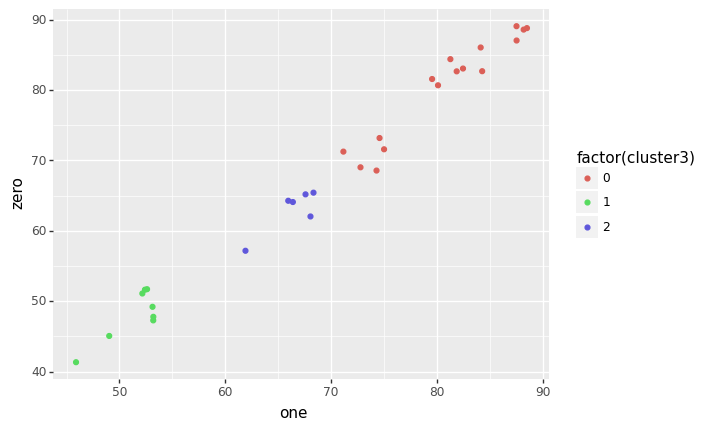

<ggplot: (101390109913)>

In [15]:
(ggplot(tests_wide, aes(x = "one", y = "zero")) + geom_point(aes(color = "factor(cluster3)")))